Starting complete statistical analysis...
Starting complete statistical analysis of Galois groups database...
Successfully loaded 126396 polynomials
BASIC STATISTICAL ANALYSIS

1. GALOIS GROUP DISTRIBUTION:
  A7: 56997 polynomials (45.09%)
  PSL(3,2): 40977 polynomials (32.42%)
  C7 ⋊ C3: 24457 polynomials (19.35%)
  D7: 2163 polynomials (1.71%)
  C7 ⋊ C6: 1550 polynomials (1.23%)
  C7: 252 polynomials (0.20%)

2. DISCRIMINANT STATISTICS:
  Mean |discriminant| (log10): 14.48
  Std |discriminant| (log10): 4.66
  Discriminant sign distribution:
    Positive: 122891 (97.23%)
    Negative: 3505 (2.77%)

HEIGHT ANALYSIS
Computing various height measures...
Mean height: 27022246170.52
Mean log height: 3.3227
Mean normalized height: 27.02
Mean Euclidean height: 29961842783.14
Mean Mahler height: 3099280114.57
Height range: [2.00, 30146683369044.00]

Height statistics by Galois group:
                                 mean              std    min  \
math_galois_notation                         

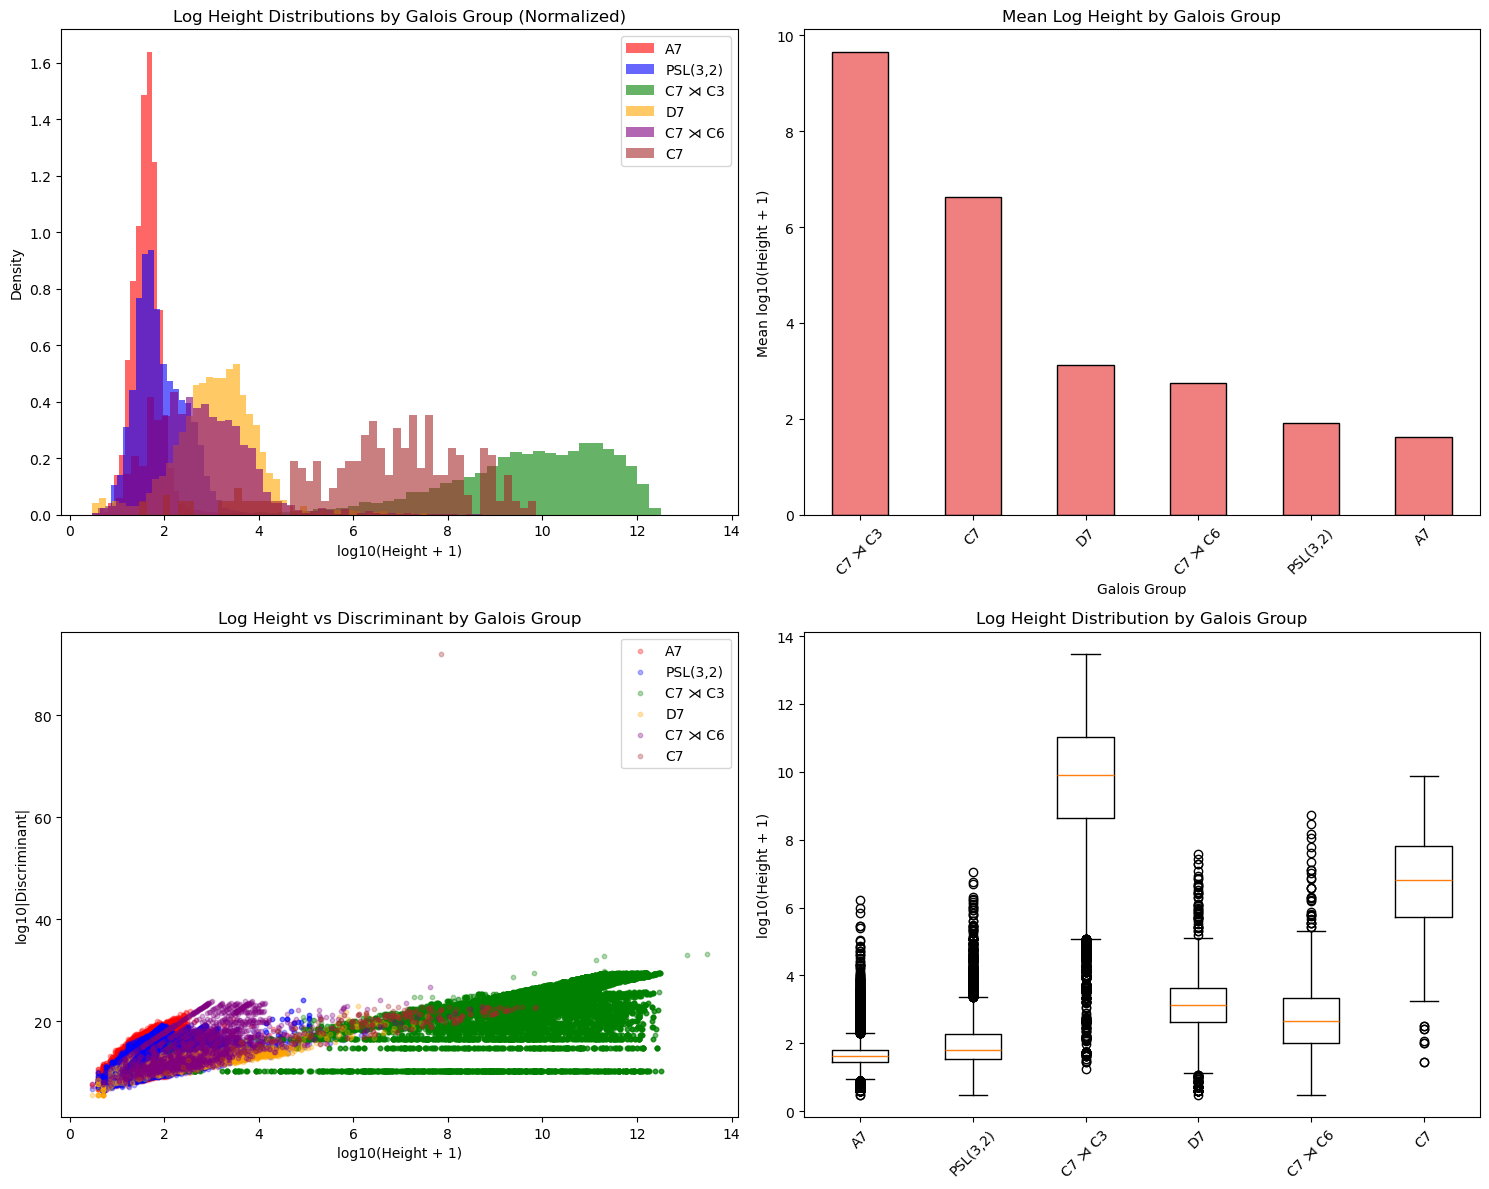

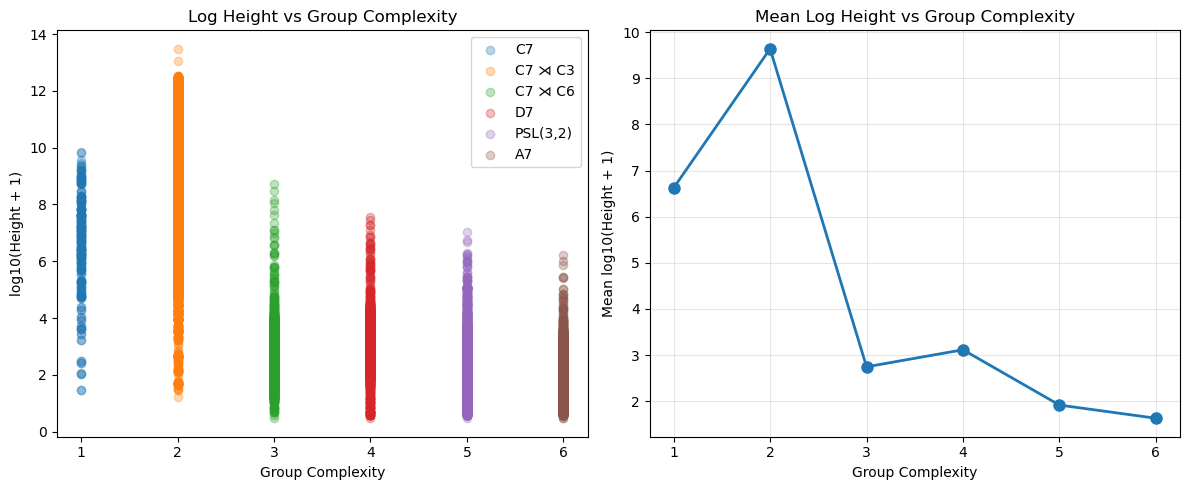


Spearman correlation (Complexity vs Log Height): -0.6683, p-value: 0.0000e+00

ADVANCED STATISTICAL TESTS
ANOVA test for log height differences between Galois groups:
  F-statistic: 313354.8604
  p-value: 0.0000e+00
  → Significant differences in log heights between groups!

Kruskal-Wallis test (non-parametric):
  H-statistic: 67971.2670
  p-value: 0.0000e+00

Spearman correlation (Log Height vs log10|Discriminant|):
  Correlation coefficient: 0.5627
  p-value: 0.0000e+00

ADVANCED GROUP ANALYSIS

Analysis by Group Size (using log heights):
                     Group Size  Mean Log Height  Std Log Height  \
math_galois_notation                                               
A7                         2520           1.6315          0.3161   
C7                            7           6.6244          1.6982   
C7 ⋊ C3                      21           9.6398          1.7668   
C7 ⋊ C6                      42           2.7464          1.0245   
D7                           14           3.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sage.all import *
from builtins import int as pyint

# Set up plotting style
plt.rcParams['figure.figsize'] = (12, 8)

PATH = "/Users/jurimezini/Library/CloudStorage/Dropbox/Sage_Galois7/AIMS-Galois-7/AIMS-7inv.2025.csv"

def read_and_prepare_data():
    """Read the database and prepare for analysis"""
    try:
        df = pd.read_csv(PATH)
        
        # Ensure expected columns exist
        needed = ["label","math_galois_notation","a0","a1","a2","a3","a4","a5","a6","a7",
                  "disc","disc_sign","disc_log10abs","j0","j1","j2","j3","j4","coeffs"]
        missing = [c for c in needed if c not in df.columns]
        if missing:
            print("Missing columns:", missing)
        
        # Clean data - remove rows with missing critical values
        df = df.dropna(subset=['math_galois_notation', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7'])
        
        print(f"Successfully loaded {len(df)} polynomials")
        return df
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

def compute_height(row):
    """Compute the height of polynomial from coefficients"""
    try:
        # Height is the maximum absolute value of coefficients
        coeffs = [abs(float(row[f"a{i}"])) for i in range(8)]
        return max(coeffs)
    except:
        return None

def compute_log_height(row):
    """Compute log height to handle large values"""
    try:
        coeffs = [abs(float(row[f"a{i}"])) for i in range(8)]
        height = max(coeffs)
        return float(np.log10(height + 1))  # +1 to avoid log(0)
    except:
        return None

def compute_normalized_height(row):
    """Compute normalized height (scaled)"""
    try:
        coeffs = [abs(float(row[f"a{i}"])) for i in range(8)]
        height = max(coeffs)
        # Normalize by dividing by a large number to make values manageable
        return float(height / 1e9)  # Divide by 1 billion
    except:
        return None

def compute_mahler_height(row):
    """Compute Mahler height using correct SageMath method"""
    try:
        # Create polynomial from coefficients
        coeffs = [float(row[f"a{i}"]) for i in range(8)]
        R = PolynomialRing(QQ, 'x')
        poly = R(coeffs)
        
        # Use complex roots to compute Mahler measure
        if poly.degree() > 0:
            complex_roots = poly.roots(CC, multiplicities=False)
            mahler = 1.0
            for root in complex_roots:
                mahler *= max(1, abs(root))
            return float(mahler)
        else:
            return 1.0
    except Exception as e:
        return None

def compute_euclidean_height(row):
    """Compute Euclidean height (L2 norm of coefficients)"""
    try:
        coeffs = [float(row[f"a{i}"]) for i in range(8)]
        return float(np.sqrt(sum(c**2 for c in coeffs)))
    except:
        return None

def basic_statistical_analysis(df):
    """Perform basic statistical analysis"""
    print("=" * 60)
    print("BASIC STATISTICAL ANALYSIS")
    print("=" * 60)
    
    # 1. Galois Group Distribution
    print("\n1. GALOIS GROUP DISTRIBUTION:")
    group_counts = df['math_galois_notation'].value_counts()
    group_proportions = df['math_galois_notation'].value_counts(normalize=True)
    
    for group, count in group_counts.items():
        proportion = group_proportions[group]
        print(f"  {group}: {count} polynomials ({proportion:.2%})")
    
    # 2. Discriminant Statistics
    print(f"\n2. DISCRIMINANT STATISTICS:")
    print(f"  Mean |discriminant| (log10): {df['disc_log10abs'].mean():.2f}")
    print(f"  Std |discriminant| (log10): {df['disc_log10abs'].std():.2f}")
    if 'disc_sign' in df.columns:
        print(f"  Discriminant sign distribution:")
        print(f"    Positive: {(df['disc_sign'] == 1).sum()} ({(df['disc_sign'] == 1).mean():.2%})")
        print(f"    Negative: {(df['disc_sign'] == -1).sum()} ({(df['disc_sign'] == -1).mean():.2%})")
    
    return group_counts, group_proportions

def height_analysis(df):
    """Analyze height distributions and relationships"""
    print("\n" + "=" * 60)
    print("HEIGHT ANALYSIS")
    print("=" * 60)
    
    print("Computing various height measures...")
    
    # Compute multiple height measures
    df['height'] = df.apply(compute_height, axis=1)
    df['log_height'] = df.apply(compute_log_height, axis=1)
    df['normalized_height'] = df.apply(compute_normalized_height, axis=1)
    df['euclidean_height'] = df.apply(compute_euclidean_height, axis=1)
    df['mahler_height'] = df.apply(compute_mahler_height, axis=1)
    
    print(f"Mean height: {df['height'].mean():.2f}")
    print(f"Mean log height: {df['log_height'].mean():.4f}")
    print(f"Mean normalized height: {df['normalized_height'].mean():.2f}")
    print(f"Mean Euclidean height: {df['euclidean_height'].mean():.2f}")
    if df['mahler_height'].notna().any():
        print(f"Mean Mahler height: {df['mahler_height'].mean():.2f}")
    
    print(f"Height range: [{df['height'].min():.2f}, {df['height'].max():.2f}]")
    
    # Height by Galois group - FIXED: use Python int instead of Sage Integer
    print("\nHeight statistics by Galois group:")
    height_by_group = df.groupby('math_galois_notation')['height'].agg(['mean', 'std', 'min', 'max', 'count'])
    
    # Convert to regular Python floats for display
    for col in ['mean', 'std', 'min', 'max']:
        height_by_group[col] = height_by_group[col].apply(lambda x: f"{float(x):.2f}")
    height_by_group['count'] = height_by_group['count'].apply(pyint)
    
    print(height_by_group)
    
    return df

def create_visualizations(df, group_counts):
    """Create comprehensive visualizations using normalized heights"""
    
    # Use normalized heights for better visualization
    plt.figure(figsize=(15, 12))
    
    # Plot 1: Log height distributions for main groups
    plt.subplot(2, 2, 1)
    main_groups = ['A7', 'PSL(3,2)', 'C7 ⋊ C3', 'D7', 'C7 ⋊ C6', 'C7']
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    
    for group, color in zip(main_groups, colors):
        group_data = df[df['math_galois_notation'] == group]['log_height']
        plt.hist(group_data, bins=50, alpha=0.6, label=group, color=color, density=True)
    
    plt.xlabel('log10(Height + 1)')
    plt.ylabel('Density')
    plt.title('Log Height Distributions by Galois Group (Normalized)')
    plt.legend()
    
    # Plot 2: Mean log height by group
    plt.subplot(2, 2, 2)
    mean_log_heights = df.groupby('math_galois_notation')['log_height'].mean().sort_values(ascending=False)
    mean_log_heights.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Mean Log Height by Galois Group')
    plt.xlabel('Galois Group')
    plt.ylabel('Mean log10(Height + 1)')
    plt.xticks(rotation=45)
    
    # Plot 3: Log Height vs Discriminant colored by group
    plt.subplot(2, 2, 3)
    for group, color in zip(main_groups, colors):
        group_data = df[df['math_galois_notation'] == group]
        plt.scatter(group_data['log_height'], group_data['disc_log10abs'], 
                   alpha=0.3, label=group, color=color, s=10)
    
    plt.xlabel('log10(Height + 1)')
    plt.ylabel('log10|Discriminant|')
    plt.title('Log Height vs Discriminant by Galois Group')
    plt.legend()
    
    # Plot 4: Box plot of log heights by group
    plt.subplot(2, 2, 4)
    data_to_plot = []
    labels = []
    for group in main_groups:
        group_heights = df[df['math_galois_notation'] == group]['log_height']
        data_to_plot.append(group_heights)
        labels.append(group)
    
    plt.boxplot(data_to_plot, labels=labels)
    plt.xticks(rotation=45)
    plt.ylabel('log10(Height + 1)')
    plt.title('Log Height Distribution by Galois Group')
    
    plt.tight_layout()
    plt.show()
    
    # Additional analysis: Group complexity vs height
    create_complexity_analysis(df)

def create_complexity_analysis(df):
    """Analyze relationship between group complexity and height"""
    
    # Define group complexity (rough measure)
    complexity_order = {
        'C7': 1,           # Cyclic - simplest
        'C7 ⋊ C3': 2,      # Semidirect product
        'C7 ⋊ C6': 3,      # Larger semidirect product  
        'D7': 4,           # Dihedral
        'PSL(3,2)': 5,     # Simple group
        'A7': 6            # Alternating - most complex
    }
    
    df['complexity'] = df['math_galois_notation'].map(complexity_order)
    
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Log height vs group complexity
    plt.subplot(1, 2, 1)
    for group in complexity_order:
        group_data = df[df['math_galois_notation'] == group]
        plt.scatter([complexity_order[group]] * len(group_data), 
                   group_data['log_height'], alpha=0.3, label=group)
    
    plt.xlabel('Group Complexity')
    plt.ylabel('log10(Height + 1)')
    plt.title('Log Height vs Group Complexity')
    plt.legend()
    
    # Plot 2: Mean log height by complexity
    plt.subplot(1, 2, 2)
    mean_log_height_by_complexity = df.groupby('complexity')['log_height'].mean()
    plt.plot(mean_log_height_by_complexity.index, mean_log_height_by_complexity.values, 
             'o-', linewidth=2, markersize=8)
    plt.xlabel('Group Complexity')
    plt.ylabel('Mean log10(Height + 1)')
    plt.title('Mean Log Height vs Group Complexity')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical test for complexity trend
    try:
        from scipy.stats import spearmanr
        corr, p_value = spearmanr(df['complexity'], df['log_height'])
        print(f"\nSpearman correlation (Complexity vs Log Height): {corr:.4f}, p-value: {p_value:.4e}")
    except:
        print("\nscipy not available for statistical tests")

def advanced_group_analysis(df):
    """Advanced analysis of group properties"""
    
    print("\n" + "=" * 60)
    print("ADVANCED GROUP ANALYSIS")
    print("=" * 60)
    
    # Group size analysis (theoretical group sizes)
    group_sizes = {
        'C7': 7,
        'C7 ⋊ C3': 21, 
        'C7 ⋊ C6': 42,
        'D7': 14,
        'PSL(3,2)': 168,
        'A7': 2520
    }
    
    df['group_size'] = df['math_galois_notation'].map(group_sizes)
    
    # Analysis by group size
    print("\nAnalysis by Group Size (using log heights):")
    size_analysis = df.groupby('math_galois_notation').agg({
        'log_height': ['mean', 'std'],
        'disc_log10abs': ['mean', 'std'],
        'group_size': 'first'
    })
    
    # Format for display
    formatted_analysis = pd.DataFrame({
        'Group Size': size_analysis[('group_size', 'first')],
        'Mean Log Height': size_analysis[('log_height', 'mean')].round(4),
        'Std Log Height': size_analysis[('log_height', 'std')].round(4),
        'Mean log10|Disc|': size_analysis[('disc_log10abs', 'mean')].round(2),
        'Std log10|Disc|': size_analysis[('disc_log10abs', 'std')].round(2)
    })
    print(formatted_analysis)
    
    # Correlation between group size and heights/discriminants
    try:
        from scipy.stats import spearmanr
        corr_height, p_height = spearmanr(df['group_size'], df['log_height'])
        corr_disc, p_disc = spearmanr(df['group_size'], df['disc_log10abs'])
        
        print(f"\nCorrelations with Group Size:")
        print(f"Group Size vs Log Height: ρ = {corr_height:.4f}, p = {p_height:.4e}")
        print(f"Group Size vs Discriminant: ρ = {corr_disc:.4f}, p = {p_disc:.4e}")
    except:
        print("\nscipy not available for correlation analysis")

def advanced_statistical_tests(df):
    """Perform advanced statistical tests using log heights"""
    print("\n" + "=" * 60)
    print("ADVANCED STATISTICAL TESTS")
    print("=" * 60)
    
    try:
        from scipy.stats import f_oneway, spearmanr, kruskal
        
        # ANOVA: Test if log heights differ significantly between groups
        groups = []
        group_names = []
        for group_name in df['math_galois_notation'].unique():
            group_heights = df[df['math_galois_notation'] == group_name]['log_height'].dropna()
            if len(group_heights) > 1:  # Need at least 2 samples
                groups.append(group_heights)
                group_names.append(group_name)
        
        if len(groups) >= 2:
            # ANOVA test
            f_stat, p_value = f_oneway(*groups)
            print(f"ANOVA test for log height differences between Galois groups:")
            print(f"  F-statistic: {f_stat:.4f}")
            print(f"  p-value: {p_value:.4e}")
            if p_value < 0.05:
                print("  → Significant differences in log heights between groups!")
            else:
                print("  → No significant differences in log heights between groups.")
            
            # Kruskal-Wallis test (non-parametric alternative)
            h_stat, h_p_value = kruskal(*groups)
            print(f"\nKruskal-Wallis test (non-parametric):")
            print(f"  H-statistic: {h_stat:.4f}")
            print(f"  p-value: {h_p_value:.4e}")
        
        # Correlation tests
        corr_coef, corr_p = spearmanr(df['log_height'].dropna(), df['disc_log10abs'].dropna())
        print(f"\nSpearman correlation (Log Height vs log10|Discriminant|):")
        print(f"  Correlation coefficient: {corr_coef:.4f}")
        print(f"  p-value: {corr_p:.4e}")
        
    except ImportError:
        print("scipy not available - skipping advanced tests")

def main():
    """Main function to run all analyses"""
    print("Starting complete statistical analysis of Galois groups database...")
    
    # Read and prepare data
    df = read_and_prepare_data()
    if df is None:
        return None
    
    # Basic statistical analysis
    group_counts, group_proportions = basic_statistical_analysis(df)
    
    # Height analysis
    df = height_analysis(df)
    
    # Create visualizations
    create_visualizations(df, group_counts)
    
    # Advanced statistical tests
    advanced_statistical_tests(df)
    
    # Advanced group analysis
    advanced_group_analysis(df)
    
    # Final summary
    print("\n" + "=" * 60)
    print("FINAL SUMMARY")
    print("=" * 60)
    print(f"Total polynomials analyzed: {len(df)}")
    print(f"Galois groups: {df['math_galois_notation'].nunique()}")
    print(f"Raw height range: {df['height'].min():.1f} to {df['height'].max():.1f}")
    print(f"Log height range: {df['log_height'].min():.4f} to {df['log_height'].max():.4f}")
    print(f"Discriminant range (log10): {df['disc_log10abs'].min():.1f} to {df['disc_log10abs'].max():.1f}")
    
    # Save results
    try:
        output_path = PATH.replace('.csv', '_statistical_analysis.csv')
        df.to_csv(output_path, index=False)
        print(f"\nResults saved to: {output_path}")
    except Exception as e:
        print(f"Could not save file: {e}")
    
    return df

# Run the complete analysis
print("Starting complete statistical analysis...")
df_final = main()

if df_final is not None:
    print("\n" + "=" * 60)
    print("ANALYSIS COMPLETE!")
    print("=" * 60)
    print("Key findings:")
    print("- Galois group distributions and frequencies")
    print("- Height statistics for each group (using log scale for large values)") 
    print("- Relationships between height and discriminant")
    print("- Group complexity analysis")
    print("- Statistical significance tests")
else:
    print("Analysis failed - could not load data")